# Data
Import and choosing features and Targets

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data


data = load_data('Auto')

feature_names = ['horsepower', 'weight', 'acceleration']
X, y = data[feature_names],data['mpg']

X

,horsepower,weight,acceleration
name,,,
chevrolet chevelle malibu,130,3504,12.0
buick skylark 320,165,3693,11.5
plymouth satellite,150,3436,11.0
amc rebel sst,150,3433,12.0
ford torino,140,3449,10.5
...,...,...,...
ford mustang gl,86,2790,15.6
vw pickup,52,2130,24.6
dodge rampage,84,2295,11.6


## Data split

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


x_train

,horsepower,weight,acceleration
name,,,
dodge aspen,110,3620,18.7
capri ii,92,2572,14.9
ford pinto,97,2984,14.5
plymouth fury iii,150,4135,13.5
plymouth champ,64,1875,16.4
...,...,...,...
amc matador (sw),150,3892,12.5
amc gremlin,100,2789,15.0
oldsmobile starfire sx,85,2855,17.6


# Data visualisation

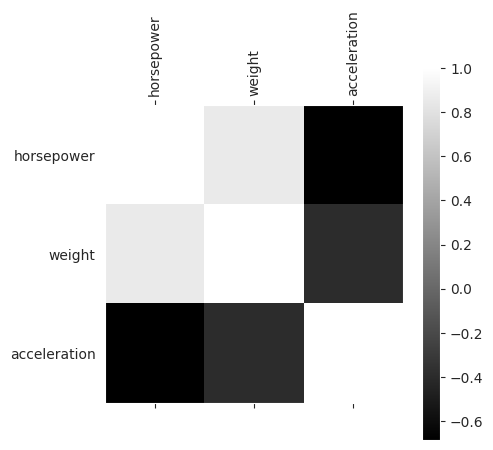

Variance
horsepower       38.283669
weight          841.133957
acceleration      2.817864
dtype: float64


,horsepower,weight,acceleration
horsepower,1.000000,0.856179,-0.685944
weight,0.856179,1.000000,-0.392906
acceleration,-0.685944,-0.392906,1.000000


In [70]:
names = x_train.columns
df_features = pd.DataFrame(x_train, columns=names)

corr_mtx = df_features.corr(method='pearson')
plt.matshow(corr_mtx, cmap="grey")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.grid(False)
plt.show()

print('Variance')
print(df_features.std())
corr_mtx

# Plotting

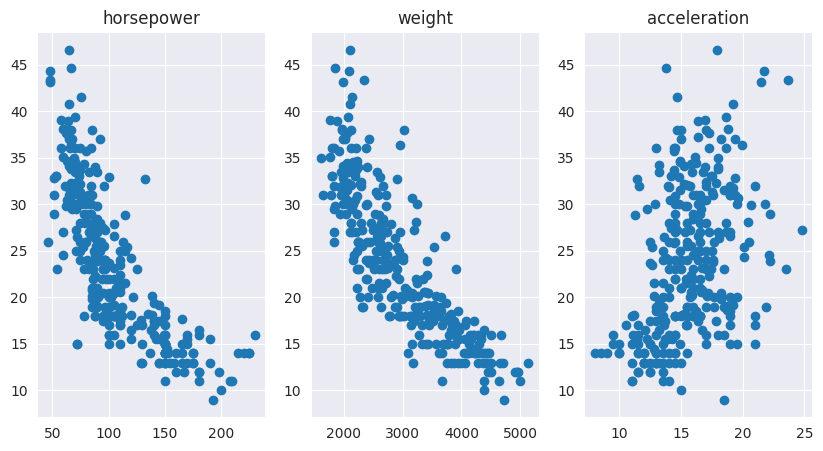

In [71]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

for idx,name in enumerate(feature_names):
    ax[idx].title.set_text(name)
    ax[idx].scatter(x_train[name], y_train, label=name)

plt.show()

## Conclusions
#### First:
Weight is strongly correlated with horsepower
#### Second:
relation seems to be quadratic function

## Dropping weight column

In [72]:
x_train = x_train.drop('weight', axis=1, errors='ignore')
x_test = x_test.drop('weight', axis=1, errors='ignore')

x_train

,horsepower,acceleration
name,,
dodge aspen,110,18.7
capri ii,92,14.9
ford pinto,97,14.5
plymouth fury iii,150,13.5
plymouth champ,64,16.4
...,...,...
amc matador (sw),150,12.5
amc gremlin,100,15.0
oldsmobile starfire sx,85,17.6


# Model

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)), ('regressor', LinearRegression(fit_intercept=False))])

pipeline

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('regressor', LinearRegression(fit_intercept=False))])

## Model training and evaluation

### Metric func

In [81]:
from sklearn.metrics import mean_squared_error, r2_score


def metric(y_hat, y_true):
    score = pd.DataFrame({
        'MSE': [mean_squared_error(y_true, y_hat)],
        'RMSE':[np.sqrt(mean_squared_error(y_true, y_hat))],
        'R2': [r2_score(y_true, y_hat)],
    })

    return score

### Training and testing

In [82]:
pipeline.fit(x_train, y_train)
metric(pipeline.predict(x_test), y_test)

,MSE,RMSE,R2
0,17.276043,4.156446,0.661523


# Plotting results

[ 8.54718300e+01 -6.05968931e-01 -1.59356019e+00  1.47722965e-03
  2.45653726e-03  1.66195866e-02]


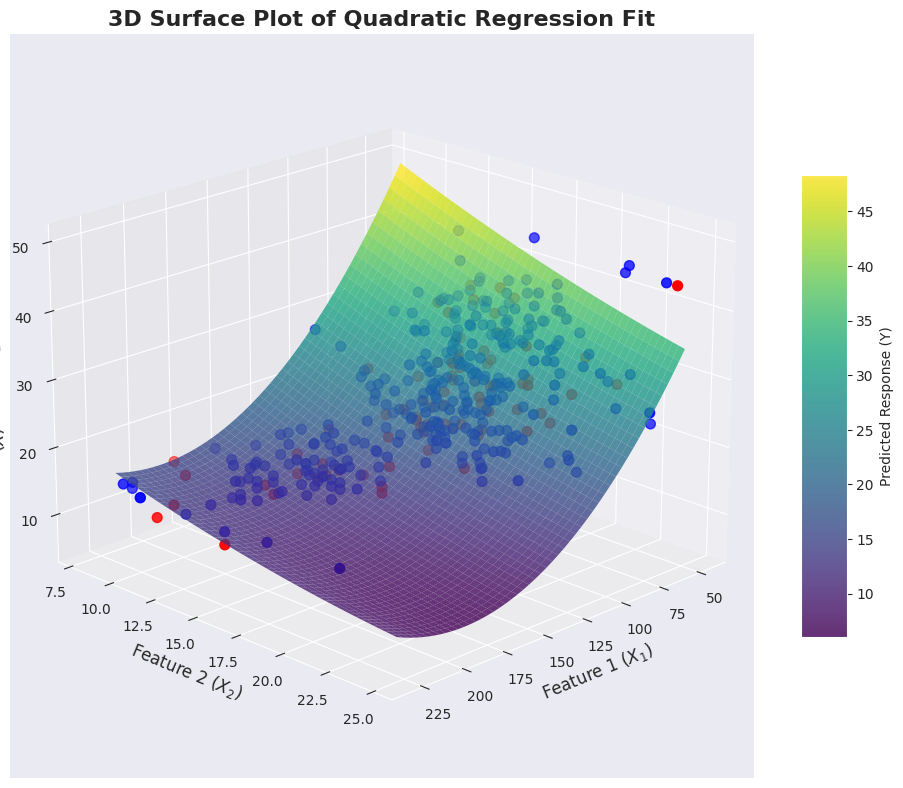

In [119]:
regressor = pipeline.named_steps['regressor']
coefficients = regressor.coef_.ravel()


print(coefficients)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Necessary for 3D plots



def quadratic_surface(X1, X2, coefs):
    b, b1, b2, a1, m, a2 = coefs
    return b + (b1 * X1) + (b2 * X2) + (a1 * X1**2) + (a2 * X2**2) + m*X1*X2






x1, x2 = x_test['horsepower'], x_test['acceleration']
X1_min, X1_max = min(x1), max(x1)
X2_min, X2_max = min(x2), max(x2)


grid_points = 50
X1_grid = np.linspace(X1_min, X1_max, grid_points)
X2_grid = np.linspace(X2_min, X2_max, grid_points)

X1, X2 = np.meshgrid(X1_grid, X2_grid)


Z_predicted = quadratic_surface(X1, X2, coefficients)

# --- 4. Plotting the 3D Surface ---

fig = plt.figure(figsize=(12, 10))
# Tell matplotlib this is a 3D plot
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(
    X1, X2, Z_predicted,
    cmap='viridis',      # Color map (e.g., 'viridis', 'coolwarm')
    edgecolor='none',    # No lines between grid squares
    alpha=0.8            # Slight transparency
)

# Add a color bar to show the height (Response Y)
fig.colorbar(surface, shrink=0.6, aspect=10, label='Predicted Response (Y)')

# --- 5. Add Labels, Title, and View Angle ---

ax.set_title('3D Surface Plot of Quadratic Regression Fit', fontsize=16, fontweight='bold')
ax.set_xlabel('Feature 1 ($X_1$)', fontsize=12)
ax.set_ylabel('Feature 2 ($X_2$)', fontsize=12)
ax.set_zlabel('Response ($Y$)', fontsize=12)

# Adjust the viewing angle for better visualization (optional)
ax.view_init(elev=20, azim=45) # Elev=elevation, Azim=azimuth (rotation)

ax.scatter(
    x_train['horsepower'],
    x_train['acceleration'],
    y_train,
    color='blue',
    s=50, # Size of markers
    label='Observed Data Points',
    zorder=10 # Ensures points are rendered on top of the surface
)


ax.scatter(
    x1,
    x2,
    y_test,
    color='red',
    s=50, # Size of markers
    label='Observed Data Points',
    zorder=10 # Ensures points are rendered on top of the surface
)


# Display the plot
plt.show()